In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
file_path = "../data/ecommerce_churn.xlsx"

xls = pd.ExcelFile(file_path)
print("Sheet names:", xls.sheet_names)

df = pd.read_excel(file_path, sheet_name="Ecommerce_Data")

df.head()

Sheet names: ['Data_Dictionary', 'Ecommerce_Data']


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
print("\nInfo dataset:")
df.info()

print("\nDeskripsi statistik numerik:")
display(df.describe())

print("\nCek missing values:")
df.isnull().sum()


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  Num

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000



Cek missing values:


CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [4]:
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
            'OrderAmountHikeFromlastYear', 'CouponUsed', 
            'OrderCount', 'DaySinceLastOrder']

for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

df[num_cols].isnull().sum()

Tenure                         0
WarehouseToHome                0
HourSpendOnApp                 0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
dtype: int64

In [5]:
cat_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
             'PreferedOrderCat', 'MaritalStatus']

for col in cat_cols:
    df[col] = df[col].astype('category')

df.dtypes

CustomerID                        int64
Churn                             int64
Tenure                          float64
PreferredLoginDevice           category
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode           category
Gender                         category
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat               category
SatisfactionScore                 int64
MaritalStatus                  category
NumberOfAddress                   int64
Complain                          int64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                  float64
dtype: object

In [6]:
print("Ukuran sebelum encoding:", df.shape)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Ukuran sesudah encoding:", df_encoded.shape)

df_encoded.head()

Ukuran sebelum encoding: (5630, 20)
Ukuran sesudah encoding: (5630, 31)


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True


In [7]:
num_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
            'OrderAmountHikeFromlastYear', 'CouponUsed', 
            'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = len(df)
        df = df[(df[col] >= lower) & (df[col] <= upper)]
        after = len(df)
        print(f"{col}: removed {before - after} outliers")
    return df

df_no_outliers = remove_outliers_iqr(df_encoded, num_cols)
print("\nJumlah data setelah buang outlier:", df_no_outliers.shape)

Tenure: removed 4 outliers
WarehouseToHome: removed 2 outliers
HourSpendOnApp: removed 6 outliers
OrderAmountHikeFromlastYear: removed 33 outliers
CouponUsed: removed 618 outliers
OrderCount: removed 648 outliers
DaySinceLastOrder: removed 189 outliers
CashbackAmount: removed 297 outliers

Jumlah data setelah buang outlier: (3833, 31)


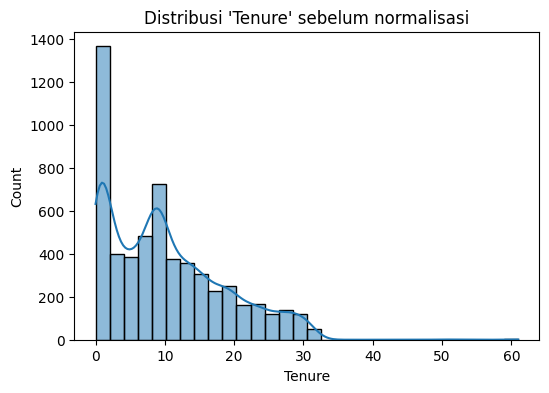

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Tenure'], kde=True, bins=30)
plt.title("Distribusi 'Tenure' sebelum normalisasi")
plt.show()

In [9]:
scaler = MinMaxScaler()
df_no_outliers[num_cols] = scaler.fit_transform(df_no_outliers[num_cols])

print("Contoh hasil normalisasi:")
df_no_outliers[num_cols].head()

Contoh hasil normalisasi:


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0.129032,0.032258,0.666667,0.000000,0.333333,0.0,0.555556,0.378091
1,0.290323,0.096774,0.666667,0.285714,0.000000,0.0,0.000000,0.082006
2,0.290323,0.806452,0.333333,0.214286,0.000000,0.0,0.333333,0.077302
3,0.000000,0.322581,0.333333,0.857143,0.000000,0.0,0.333333,0.181915
4,0.000000,0.225806,0.666667,0.000000,0.333333,0.0,0.333333,0.148005


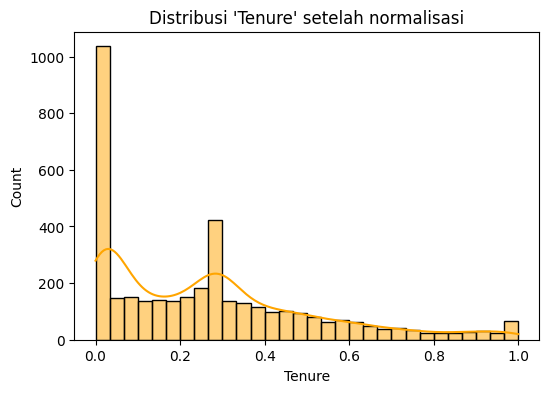

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df_no_outliers['Tenure'], kde=True, bins=30, color='orange')
plt.title("Distribusi 'Tenure' setelah normalisasi")
plt.show()

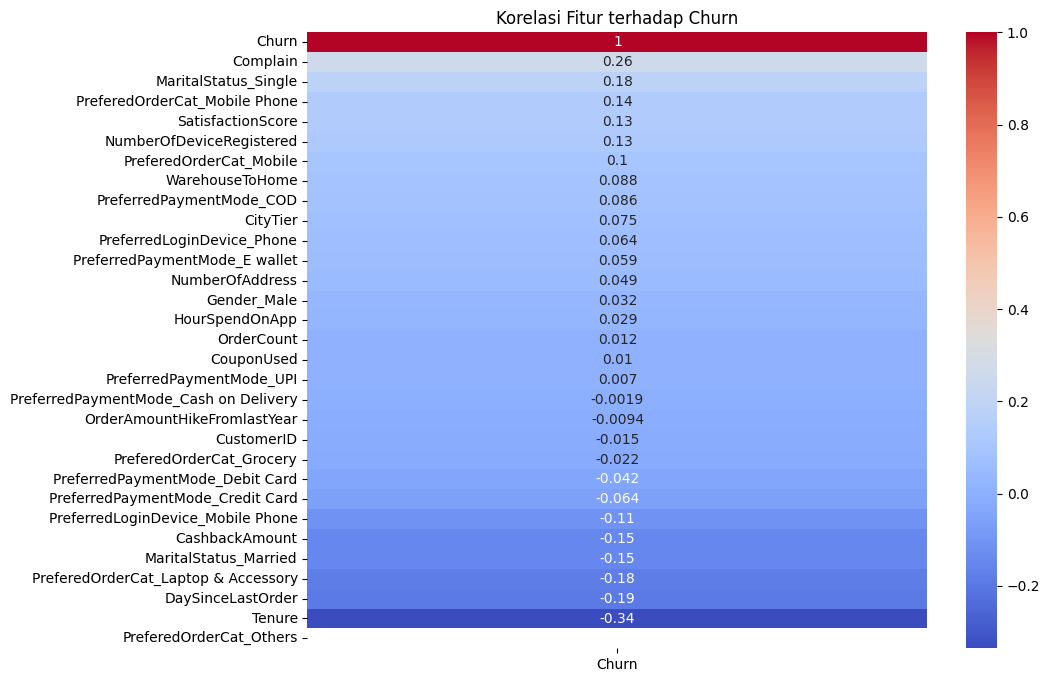

In [11]:
corr = df_no_outliers.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur terhadap Churn")
plt.show()

In [12]:
X = df_no_outliers.drop(columns=['Churn', 'CustomerID'])
y = df_no_outliers['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran data train:", X_train.shape)
print("Ukuran data test:", X_test.shape)

Ukuran data train: (3066, 29)
Ukuran data test: (767, 29)


In [13]:
X_train.to_csv("../output/X_train.csv", index=False)
X_test.to_csv("../output/X_test.csv", index=False)
y_train.to_csv("../output/y_train.csv", index=False)
y_test.to_csv("../output/y_test.csv", index=False)
